In [ ]:
!pip install pyswarms #BIBLIOTECA REQUERIDA

2021-02-02 17:03:42,523 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 2, 'c2': 2, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=2.27e-13
2021-02-02 17:03:44,801 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2737367544323206e-13, best pos: [420.96874606 420.96874644]


O valor Mínimo de f é: 2.2737367544323206e-13
x1: 420.9687460635771
x2: 420.96874644304944


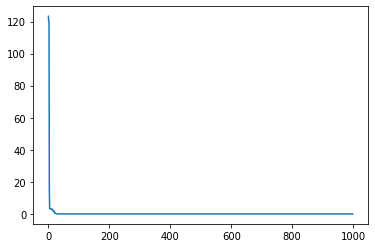

In [ ]:
"""
Otimização de funções de Benchmark com PSO.
"""
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
#Importar bibliotecas

def model(x1, x2):
  # definir modelo a ser minimizado
    """
    Modelo Benchmark: Função de Schwefel
    Restrições [-500, 500]
    Ótimo Global: x1, x2 = 420.9687; f(x) = 0

    Referência:
    Fortin et al. DEAP: Evolutionary Algorithms Made Easy. Journal of Machine Learning Research. 2012.
    (https://deap.readthedocs.io/en/master/api/benchmarks.html)

    https://www.sfu.ca/~ssurjano/schwef.html
    """

    f = 418.9828872724339 * 2 - \
        (x1 * m.sin(m.sqrt(abs(x1)))) - (x2 * m.sin(m.sqrt(abs(x2))))
  #função a ser minimizada
    return f


def max_f(particles):
  #definindo a pop inicial
    """
    O modelo do otimizador recebe uma lista de partículas (possíveis soluções) e deve retornar
    uma lista com os valores resposta da variável maximizada ou minimizada.

    particles: lista de listas. Cada uma dessas listas é referente a uma partícula. O primeiro
               elemento é referente à primeira variável e assim por diante.
    """
    f_list = []
    for particle in particles:
        x1 = particle[0]
        x2 = particle[1]

        f = model(x1, x2)
        f_list.append(f)
#adicionando valores na lista
    return f_list


def main_optimization(kwargs):
    """
    Estrutura principal da otimização. Criação do otimizator e execução do algoritmo. Retornar
    como resultado um dicionário contendo os valores ótimos de f, x1 e x2.
    """
    # Número de iterações do PSO
    iter = 1000
    optimizer = ps.single.GlobalBestPSO(**kwargs)  # Construção do otimizador

    cost, pos = optimizer.optimize(max_f, iter)  #otimizando função custo e dando sua posição

    cost_history = optimizer.cost_history  #histórico dos minimos

    print(f'O valor Mínimo de f é: {cost}')
    print(f'x1: {pos[0]}')
    print(f'x2: {pos[1]}')

    result = {
        'f': cost,
        'x1': pos[0],
        'x2': pos[1],
        'history': cost_history
    }
    return result


if __name__ == "__main__":
    # Restrições das variáveis do problema
    lb = [-500, -500] #minimo para x1 e x2 respectivamente
    ub = [500, 500]   #máximo para x1 e x2 respectivamente
    bounds = (lb, ub)

    # Hiperparâmetros do PSO
    options = {"c1": 2, "c2": 2, "w": 0.5}

    # Dicionário de configurações gerais do PSO
    kwargs = {
        "n_particles": 100,
        "dimensions": 2, #numero de variáveis da função a ser minimizada
        "options": options,
        "bounds": bounds
    }

    result = main_optimization(kwargs)

    plt.plot(result['history'])
    plt.show()